##Agriculture Recommender System

#**Introduction**
Since the beginning of mankind, agriculture has arguably been one of the most important steps towards creating a self-sustaining civilization. It is essential for mankind's survival and plays a vital role in developing a prosperous economy. <br>

Weather conditions and soil characteristics have a major influence on agricultural yield and much research has been done to enhance production and minimize crop loss. Modern techniques include applying machine learning algorithms to predict ideal conditions that maximize crop yield. With the help of these algorithms, farmers are able to make informed decisions and strategize for harvesting, packing, and storage operations. To implement precise predictions given different weather conditions and soil characteristics, various machine learning algorithms have been applied in the field such as Logistic Regression, Naïve Bayes, and Random Forest. Previous research applied in this domain concluded that the Random Forest algorithm provided the most accurate predictions. Therefore, this Jupyter notebook will be exploring the application of a Random Forest Classifier on a dataset that contains augmented information of rainfall, climate, and fertilizer data available for India.

##**Module Imports** <br>



*   This project will be leveraging the RandomForestClassifier module included with the Sci-kit learn library "sklearn" to implement a random forest meta estimator which will learn to recommend the most suitable crops to grow in a particular farm based on various environmental conditions and soil composition.
*   The pandas library will be used to import the dataset files into the Jupyter notebook.
*   matplotlib and seaborn will be used to visualize the dataset and plot the accuracy of the model based on various hyperparameters. 
*   Data Preprocessing will be handled by the OneHotEncoder, StandardScaler, and train_test_split modules of sklearn.
* The model will be fine-tuned using the GridSearchCV module to find the best hyperparameters appropriate for this estimator.
* The metrics associated with the estimator will be generated by the classification_report, confusion_matrix, and accuracy_score modules of sklearn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  ConfusionMatrixDisplay
import requests
import warnings
warnings.filterwarnings('ignore')

##**Importing Dataset**
*   The dataset used in this project can be found on Kaggle at: https://www.kaggle.com/atharvaingle/crop-recommendation-dataset
*   The dataset is imported into the project via the pandas read_csv function.
*   The dataset contains 8 columns: 
  * N - the ratio of Nitrogen content in the soil
  * P - the ratio of Phosphorous content in the soil
  * K - the ratio of Potassium content in the soil
  * temperature - the temperature in degrees Celsius
  * humidity - relative humidity in %
  * pH - pH value of the soil
  * rainfall - rainfall in mm
  * label - the name of the ideal crop to be produced
* The first 7 columns correspond to the input features of the RandomForestClassifier model.
* The 'label' column corresponds to the output of the model.
* The dataset will be split into training and testing subsets using the train_test_split function of sklearn. The Train/Test split ratio will be 80/20.


In [ ]:
data = pd.read_csv('Crop_recommendation.csv') #Importing Dataset.

dataset_columns = data.columns #Extracting dataset column names.
num_of_columns = len(data.columns) #Number of columns preset in the dataset.

print(f'The Crop Recommendation dataset contains the following columns: {list(dataset_columns)}. There are a total of {num_of_columns} columns.')

y = data['label'] #Extracting expected outputs from dataset.
x = data[data.columns.difference(['label'])] #Removing 'label' column from the dataset to isolate the features of the dataset.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #Train/Test Split = 80/20.

train_data_shape = X_train.shape
test_data_shape = X_test.shape
print(f'The trainig set contains {train_data_shape[0]} rows and {train_data_shape[1]} columns')
print(f'The testing set contains {test_data_shape[0]} rows and {test_data_shape[1]} columns')

The Crop Recommendation dataset contains the following columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']. There are a total of 8 columns.
The trainig set contains 1760 rows and 7 columns
The testing set contains 440 rows and 7 columns


##**Data Preprocessing**

*   The dataset was inspected using the "isnull" function of pandas to check whether there were any missing values. The function did not find any missing data points, therefore, data imputation was not required.
*   The output of the RandomForestClassifier will be a collection of labels that represent the ideal crops to grow under certain given conditions.
*   The training and test sets were initially transformed by using the StandardScaler module of sklearn to normalize the numeric columns. However, since Random Forest is a tree-based model, feature scaling is not a requirement. Training the model with or without normalizing the data yielded no significant change in the final accuracy of the model. Therefore, this step has been omitted in the code.



In [ ]:
print('Missing Datapoints: ')
print(data.isnull().sum()) #The isnull function returns the number of missing datapoints in the dataset.

unique_y_labels = np.unique(list(y_train.values)) #This function returns the unique labels/outputs present in the dataset.
print('')
print('-----------------------------------------------------------------------------------------------')
print(f'There are a total of {len(unique_y_labels)} output labels in the dataset: {unique_y_labels}')

#Since Random Forest is a tree based model, it does not require feature scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)


Missing Datapoints: 
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

-----------------------------------------------------------------------------------------------
There are a total of 22 output labels in the dataset: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


##**Data Analysis and Visualization**

In the following section, the data will be explored using various matplotlib/seaborn figures which will help visualize the data, extract any correlations between features and make inferences about it.

***Strip Plot***: The seaborn strip plot displays a scatterplot for each categorical value in the dataset with respect to a single feature. There are 7 subplots which represent the relationship between each feature and the crop label. From the plots we can infer the likelyhood of each crop flourishing when the value of a certain feature falls between a certain range.

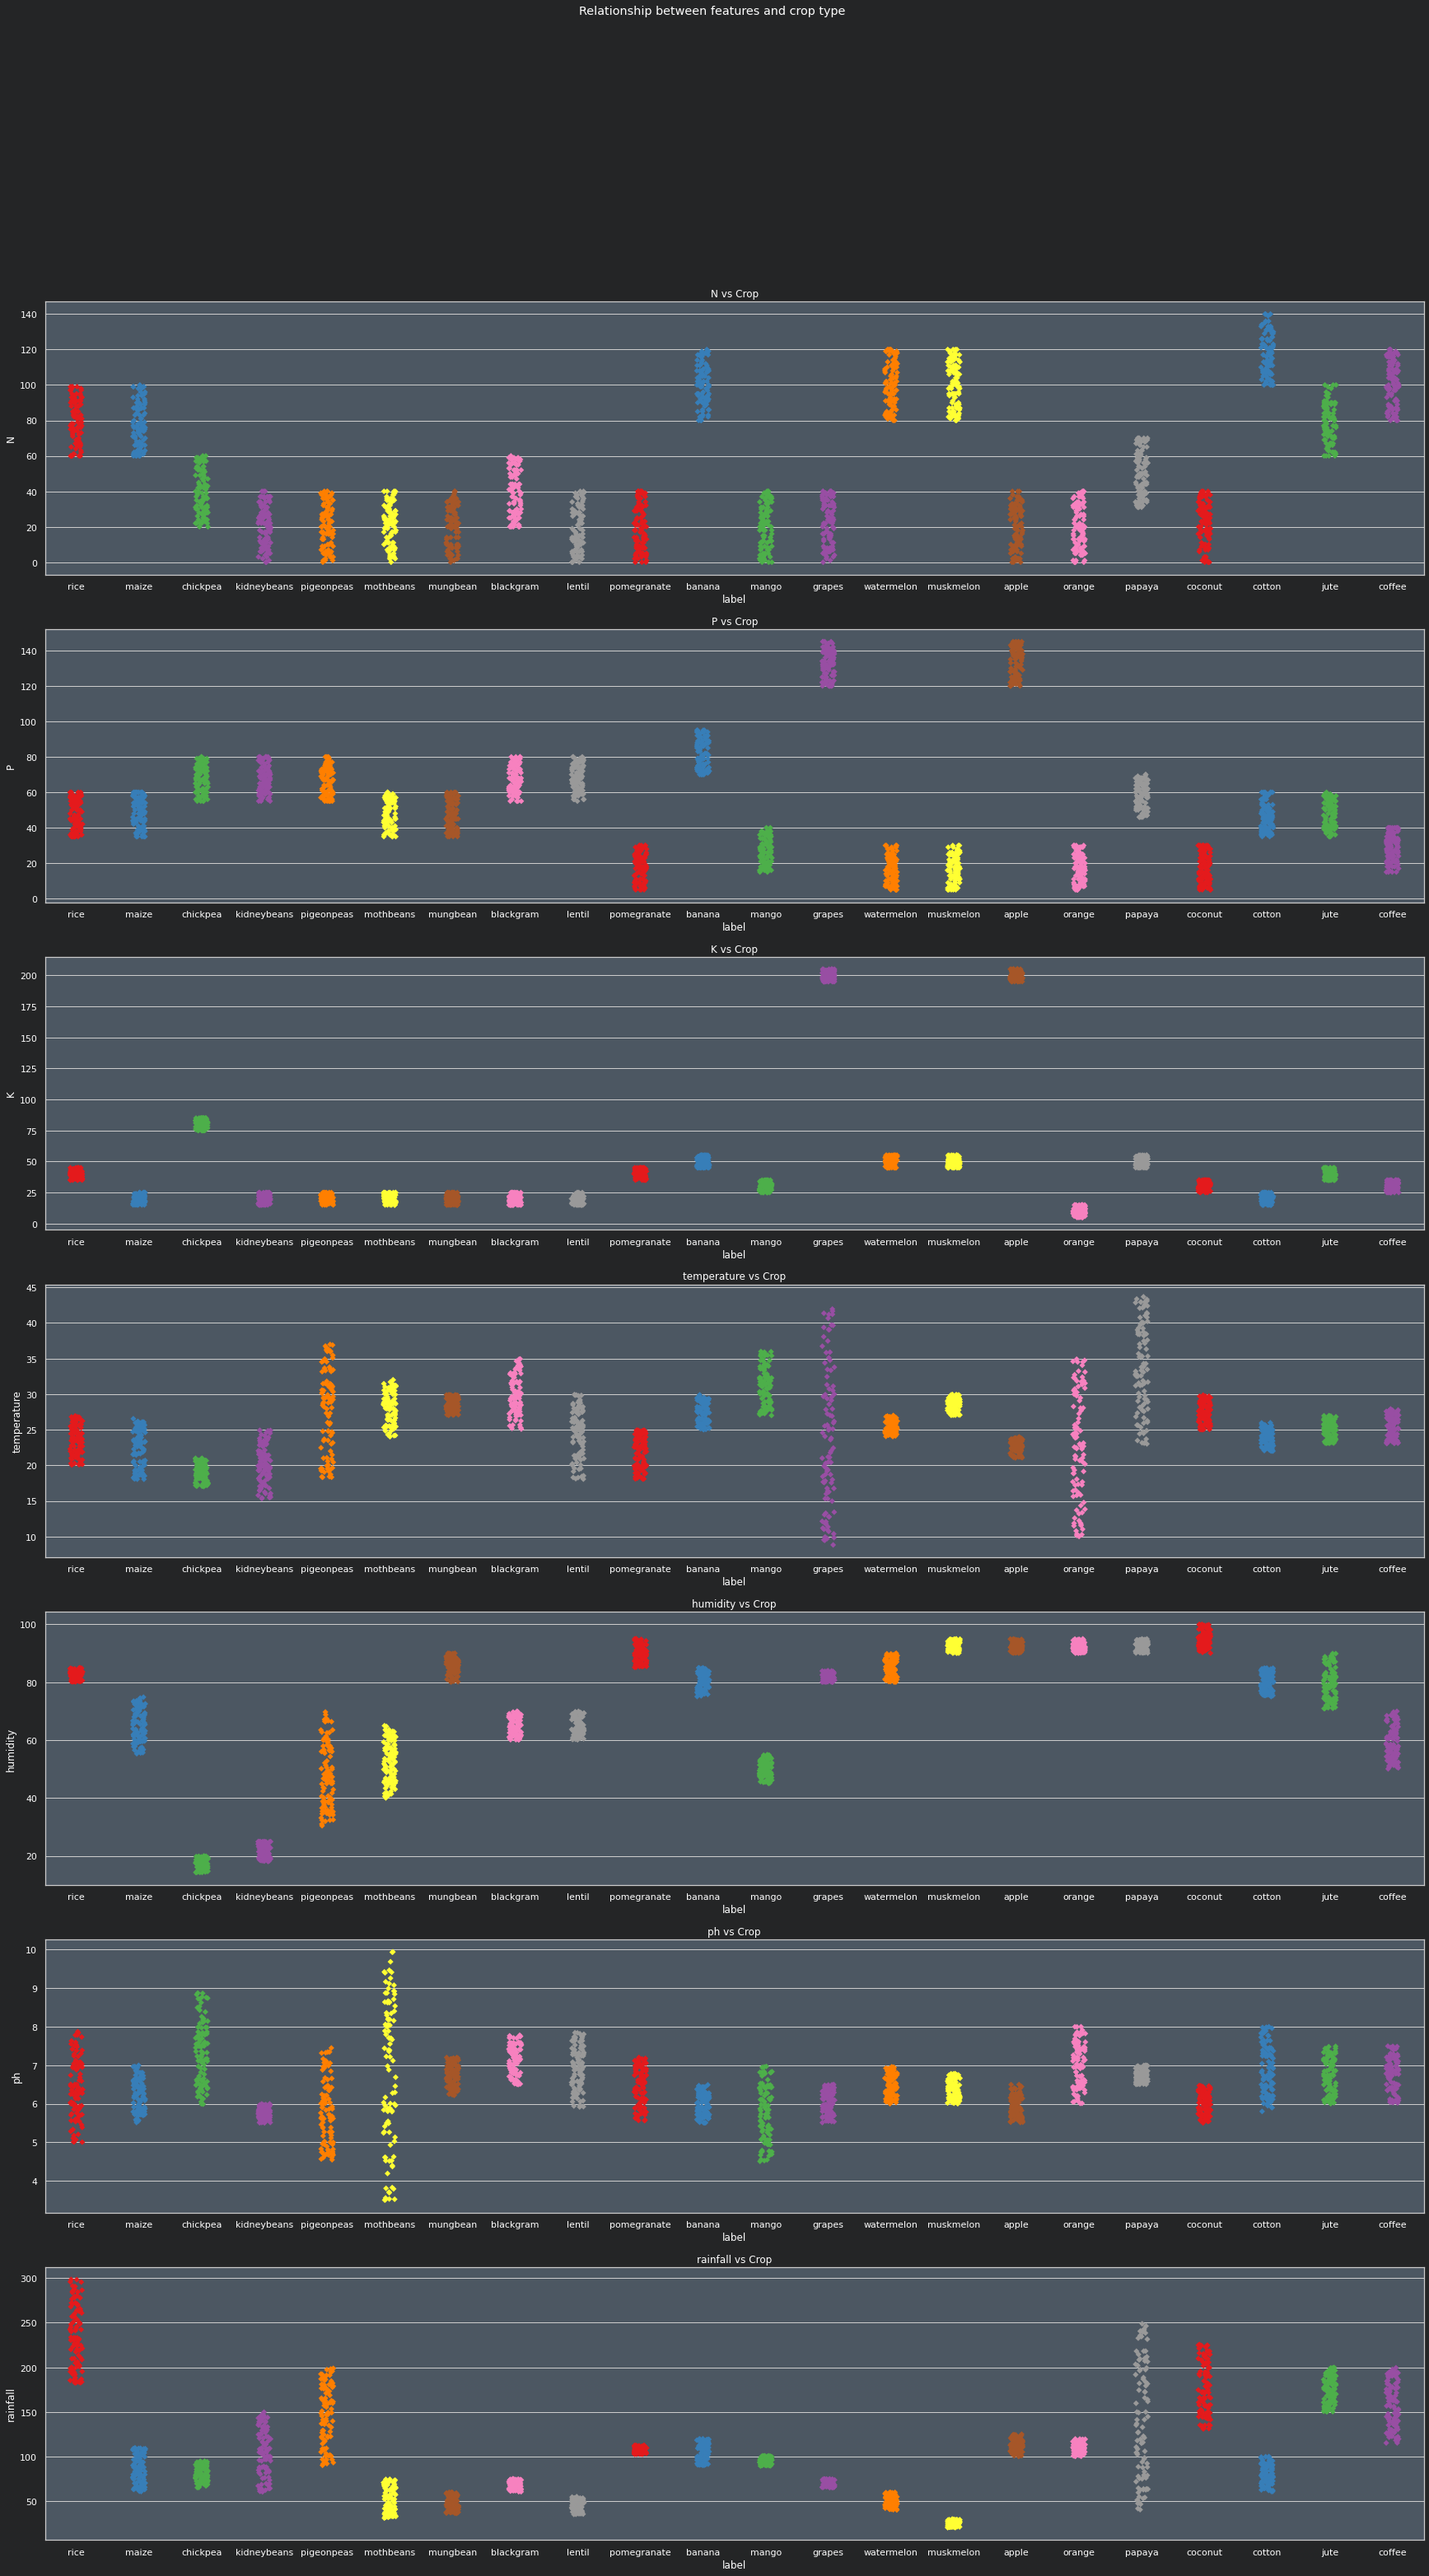

In [ ]:
sns.set_theme()
sns.set_style("whitegrid", {"axes.facecolor": "#4C5762",'figure.facecolor':'#242526','text.color': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'axes.labelcolor': 'white',})
fig, axes = plt.subplots(len(dataset_columns)-1, 1, figsize=(30,50))
fig.suptitle('Relationship between features and crop type')
for i, feature in enumerate(dataset_columns):
  if 'label' not in feature:
    axes[i].set_title(f'{feature} vs Crop')
    g = sns.stripplot(ax=axes[i], x="label", y=feature, marker='D', palette="Set1", edgecolor='gray', data=data)


From the above strip plots, we can infer the influence of each feature on the crop recommendation. Some of these inferences are listed below:
* Rainfall:
  * Increased rainfall suggests that the ideal crop would be rice.
  * Decreased rainfall suggests that the ideal crop would be muskmelon.
* pH:
  * Mothbeans can grow in a wide range of pH levels.
* Humidity:
  * Increased humidity suggests that the ideal crop would be coconut.
  * Decreased humidity suggests that the ideal crop would be chickpeas.
* Temperature:
  * Grapes can grow in a wide range of temperature zones.
* K:
  * Grapes and Apples flourish when the ratio of Potassium content in the soil is high.
* P:
  * Grapes and Apples flourish when the ratio of Phosphorous content in the soil is high.
* N:
  * Cotton would be the best crop to grow when the ratio of Nitrogen content in the soil is high.


***Distribution Plots:*** The seaborn distribution plot helps visualizes the distribution of each feature. There are 7 subplots which represent the univariate distribution of each feature.

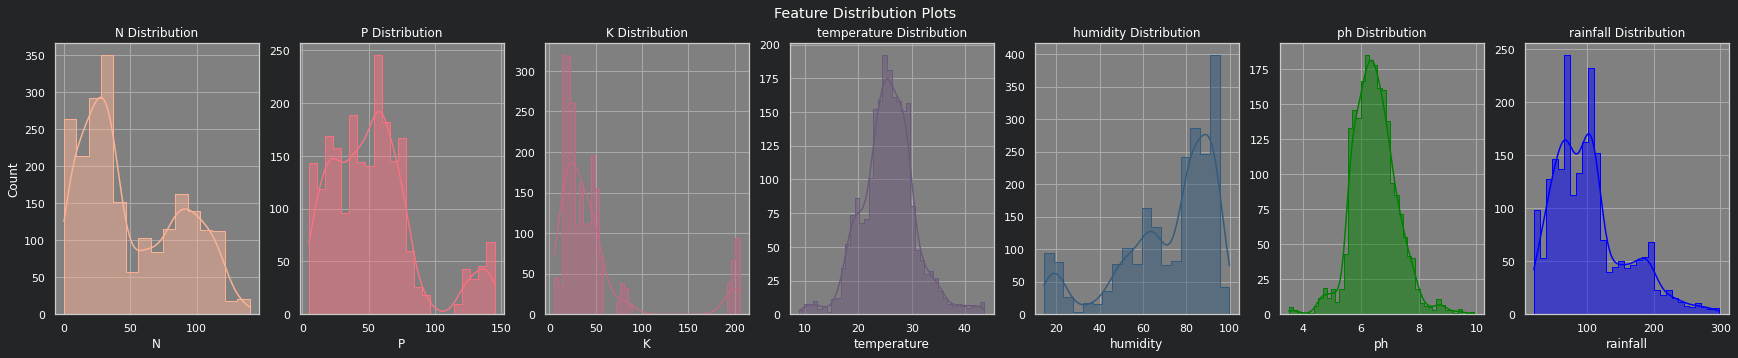

In [ ]:
sns.set_theme()
sns.set_style("whitegrid", {"axes.facecolor": "grey", 'grid.color': 'darkgrey', 'figure.facecolor':'#242526','text.color': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'axes.labelcolor': 'white',})
fig, axes = plt.subplots(1, len(dataset_columns)-1, figsize=(30,5))
fig.suptitle('Feature Distribution Plots')
sns.set_palette("Set1")
colors = ['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D', 'green', 'blue']
for i, feature in enumerate(dataset_columns):
  if 'label' not in feature:
    axes[i].set_title(f'{feature} Distribution')
    g = sns.histplot(ax=axes[i], data=data[feature], color=colors[i], kde=True, fill=True, element='step')
    if i != 0:
      g.set(ylabel=None)

***Heat Map:*** The heat map plot helps represent the correlation between the features of the dataset. This provides context on the linear relationship between the different features. <br>

The heat map below shows that "**P**" (ratio of Phosphorous content in soil) and "**K**" (ratio of Potassium content in soil) have a high correlation. <br>

Issues with features having high correlation:
* In a typical Machine Learning algorithm, the ability to detect relevant variables decreases as the correlation between the variables increase [2]. The feature importance for each variable decreases as the number of correlated variables increase. To mitigate this, when two variables are highly correlated, one of the variables is removed from the dataset since the correlated variables are interchangeable. However, since the Random Forest algorithm uses feature sampling and bootstrap aggregation, this issue is of lesser concern. Therefore, P and K will both be included in the training set. 
* The curse of dimensionality in Machine Learning states that as the number of dimensions increase, the complexity of the model and the processing power needed to analyze the data increase. Having unnecessary features in the dataset degrades the performance of the classifier. Since these features are correlated, ideally, one of them would be removed. However, each tree in a Random Forest model does not consider the entire feature set, rather a subset of features. Therefore, the feature space reduces, making the algorithm immune to the curse of dimensionality [1].

Text(0.5, 1.0, 'Heat Map of Feature Space')

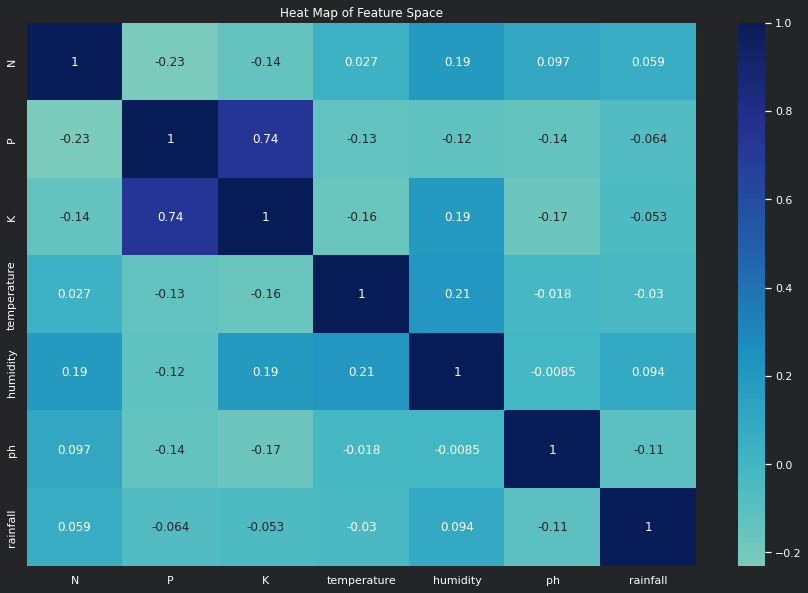

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid", {"axes.facecolor": "grey", 'grid.color': 'darkgrey', 'figure.facecolor':'#242526','text.color': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'axes.labelcolor': 'white',})
g = sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', center=0)
g.set_title('Heat Map of Feature Space')

##**Hyperparameter Tuning**
Hyperparameters are external parameters of a Machine Learning model which control the learning process and adjust the fit of the estimator. The process of optimizing these parameters to get the best fit is known as Hyperparameter tuning [3]. <br>

Since manually tuning the model to find the best hyperparameters is very time-consuming, algorithms such as grid search and random search are employed. <br>

To find the best hyperparameters for the Random Forest Classifier used in this project, the GridSearchCV module from the sklearn library is used.

**Grid Search:**
* The Grid search algorithm divides the domain of the hyperparameters into a grid. The algorithm tests every combination of parameters in the grid and calculates performance metrics. The optimal combination of parameters that maximizes the performance metrics is returned. [5]

Fitting the GridSearchCV module to the Random Forest Classifier produced the following list of optimal hyperparameters:
* 'bootstrap': True
* 'criterion': 'gini'
* 'max_depth': None
* 'max_features': 'sqrt'
* 'min_samples_leaf': 1
* 'min_samples_split': 10
* 'n_estimators': 100
* 'oob_score': True
* 'warm_start': False

In [ ]:
#The GridSearchCV algorithm was previous run and returned the optimal hyperparameters contained in the "best_params" dictionary.
# tune = {
#     'n_estimators': [10,100,300,1000],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 4, 8],
#     'min_samples_split': [2, 3,10],
#     'min_samples_leaf': [1, 3, 10],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True],
#     'warm_start': [True, False],
#     'oob_score': [True]
#   }

# classifier = RandomForestClassifier(n_jobs=-1)

# rf_grid = GridSearchCV(estimator=classifier, param_grid=tune, cv=3, verbose=3, n_jobs=-1)
# rf_grid.fit(X_train.values, y_train)
# best_params = rf_grid.best_params_

best_params = {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'oob_score': True, 'warm_start': False}


#**Training the Model**

**Random Forest**
* The Random Forest model is an ensemble of many decision trees. Each tree in the ensemble is built using a random sampling of training data points (bootstrap aggregation) and a random subset of all available features (feature sampling). The final prediction of the model is formulated by taking the average output of all the trees. Random Forest models typically perform better than single decision trees as they can handle issues such as overfitting and missing data [6]. 

The optimal parameters determined by the GridSearchCV module are used as the input parameters for the RandomForestClassifier model which is then fitted using the training subset (X_train, y_train). 

In [ ]:
classifier = RandomForestClassifier( 
    max_features=best_params['max_features'], 
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    warm_start=best_params['warm_start'],
    bootstrap=best_params['bootstrap'],
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    oob_score=best_params['oob_score'],
    random_state=1,
  )

classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       oob_score=True, random_state=1)

#**Model Predictions, Accuracy and Performance**
**Predictions:** <br>
The RandomForestClassifier module includes a method to predict the class of a given input dataset. In the following, the model will attempt to predict the class labels (ideal crops) for the testing dataset previously prepared.

**Accuracy:** <br>
The accuracy of the predictions will be calculated using the accuracy score module of the sklearn metrics library. 

The Random Forest Classifier consistently produced an accuracy of over 98% which falls in line with the conclusion of previous studies that argued the dominance of Random Forest Classifiers in this domain.

**Feature Importance:** <br>
The final generated Random Forest Classifier returns an attribute that provides context on which input features were most important in generating the forest based on its impurity. 

The results suggest that the 3 most important features were the amount of rainfall, humidity, and the ratio of Potassium content in the soil with the pH level being the least important. 

**Performance:** <br>
*   The classification_report function of the sklearn metrics library provides performance metrics such as precision, recall, and f1-score.
  * **Precision**: This is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to low false-positive rates [4]. Since the model scores a high precision rate for all labels, the false positive rate is very low.
  * **Recall** - Recall is the ratio of correctly predicted positive observations to all observations in the actual class [4]. The model scores a high recall rate which suggests that most labels have been correctly classified
  * **F1-Score**: The F1-Score is the weighted average of Precision and Recall [4]. The model scores highly in this metric as well, making the model an excellent tool for crop prediction. 

In [ ]:
y_pred = classifier.predict(X_test)
print(f'The Random Forest Classifer was able to generate a model which has an accuracy of {accuracy_score(y_test, y_pred)*100}%')

feature_importance = classifier.feature_importances_
feature_names = classifier.feature_names_in_

zip_features = zip(feature_importance, feature_names)
zip_features = sorted(zip_features, key = lambda x: x[0], reverse=True)

print(f'The features which were most important in generating the model in decreasing order are: {list(zip_features)}')
print(classification_report(y_test, y_pred))

The Random Forest Classifer was able to generate a model which has an accuracy of 99.0909090909091%
The features which were most important in generating the model in decreasing order are: [(0.23025387752575222, 'rainfall'), (0.20591419093258778, 'humidity'), (0.18224455404541942, 'K'), (0.1487799863682797, 'P'), (0.10893279670104539, 'N'), (0.07136827329244828, 'temperature'), (0.052506321134467286, 'ph')]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        10
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        20
        jute       0.88      0.96      0.92        24
 kidneybeans       1.00      1.00      1.00      

#**Visualization of Predictions:**

*   A confusion matrix of the predictions can be generated using the confusion_matrix function of the sklearn metrics library.

**Confusion Matrix:**
* The confusion matrix is a widely used metric to gauge the performance of a classification model. The matrix compares the actual labels with the predicted labels generated by the Random Forest Algorithm.

The below confusion matrix shows that the majority of the crops have been correctly classified. However, the model sometimes confused rice and jute with each other.

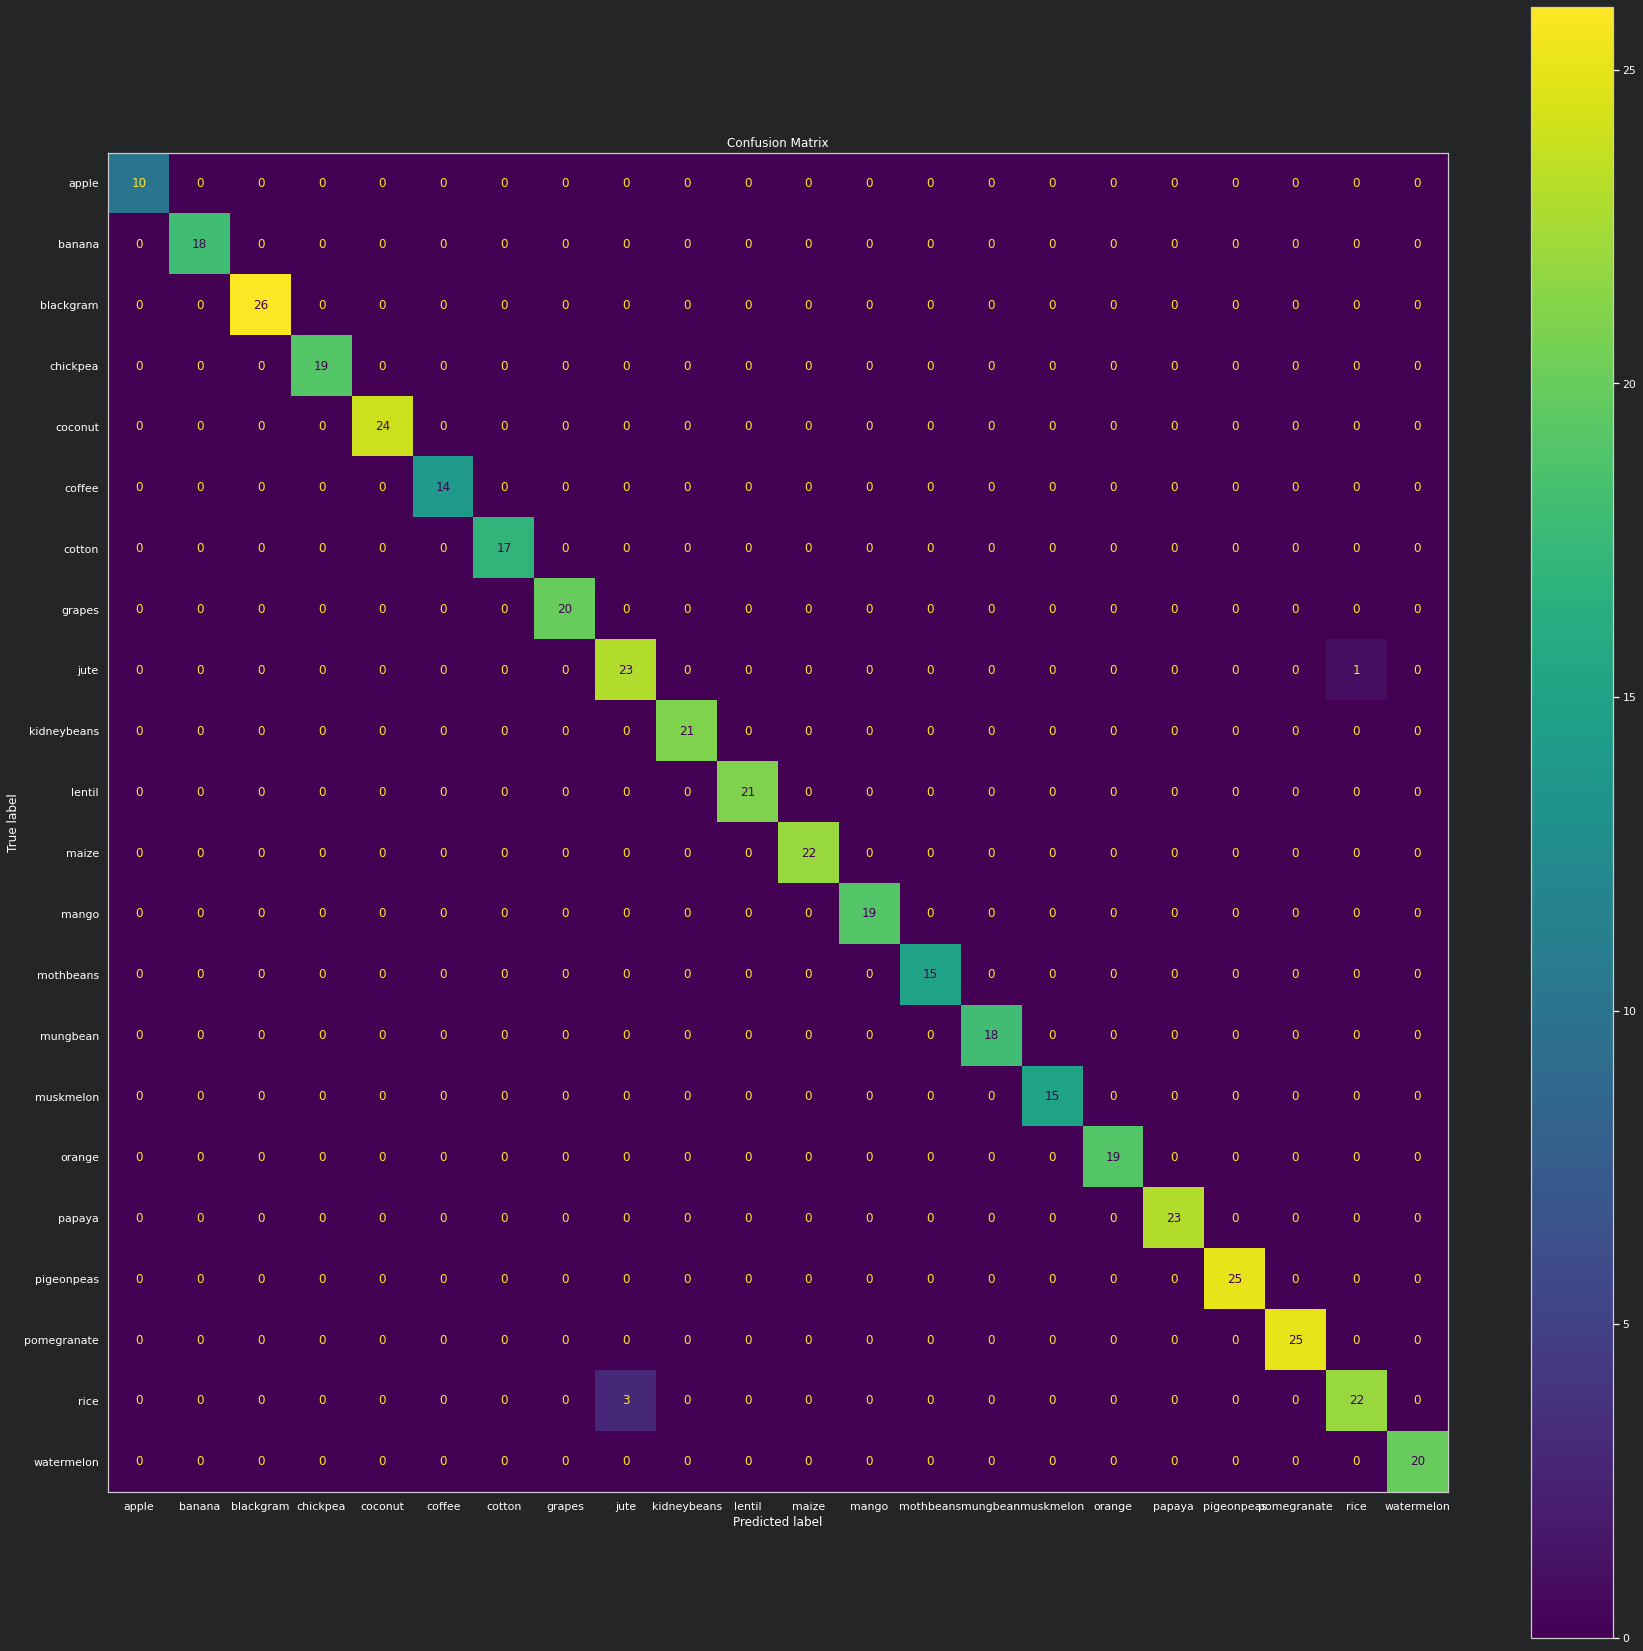

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# sns.set_style()
fig, ax = plt.subplots(figsize=(30, 30))
plt.grid(False)
ax.set_title('Confusion Matrix')
ax.tick_params(axis='x', labelrotation=45)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_y_labels)
cm_plot.plot(ax=ax)

#**Prediction Application**

In order to develop an application that farmers can use, the WeatherAPI from weatherapi.com can be leveraged to get historical weather data based on the region the farm is located in. The farmer will input their region and soil composition parameters which will then be fed into the Random Forest Classifier model which suggests the ideal crop to grow based on the data provided.

***Note:*** *The free version of the WeatherAPI only provides current and forecasted data. To receive historical data, a subscription plan must be purchased. However, for demonstration purposes, this application will simply use the current weather information to make predictions. A real-world application would use historical weather data to get the average temperature, rainfall, and humidity parameters in the region.*

In [ ]:
region = input('Current Region: ')
soil_composition = input('Soil Composition Ratio (Nitrogen, Phosphorous, Potassium, pH): ')
N, P, K, pH = soil_composition.split(',')

url = 'http://api.weatherapi.com/v1/current.json?key=ed77467029a84e71b4714114212611&q=%s&aqi=yes' % (region)
response = requests.get(url)
weather_data = response.json()

avg_humidity = weather_data['current']['humidity']
avg_temp = weather_data['current']['temp_c']
avg_rainfall = weather_data['current']['precip_mm']

prediction = classifier.predict([[K, N, P, avg_humidity, pH, avg_rainfall, avg_temp]])

print(f'The ideal crop to grow in {region} where the average weather conditions for this season are [Temperature: {avg_temp}°C, Humidity: {avg_humidity}%, Rainfall: {avg_rainfall}mm] and the soil composition contains [Nitrogen: {N}, Phosphorous: {P}, Pottasium: {K}, pH: {pH}]:')
print(f'---- {prediction[0]} ----')

Current Region: India
Soil Composition Ratio (Nitrogen, Phosphorous, Potassium, pH): 1,1,1,1
The ideal crop to grow in India where the average weather conditions for this season are [Temperature: 18.4°C, Humidity: 43%, Rainfall: 0.0mm] and the soil composition contains [Nitrogen: 1, Phosphorous: 1, Pottasium: 1, pH: 1]:
---- muskmelon ----


#**Conclusion**
With the recent advancements in the field of Machine Learning, we are able to tackle more problems in various domains. Agriculture is seen as one of the most relevant industries to apply these modern ML techniques. Farmers are more frequently using applications built with ML algorithms to make farming more efficient. Applications range from predicting crop yield and price forecasting to improving agricultural supply chain management [7]. 

From the above study of applying Random Forest Classification on agricultural datasets, we can gauge the effectiveness of developing these recommendation systems as farmers can use them to strategize and make informed decisions on the best ways to maximize yield and profit. 

With an accuracy of over 98%, the Random Forest Classifier can learn the importance of various features such as weather conditions and soil compositions and suggest the ideal crops to grow under these conditions. Real-world applications can be implemented using historical weather data, sensors to identify farm conditions and soil makeup. 

#References:

[1] Aggarwal, Tavish. “Random Forests Explained in Detail.” Tech Ladder, https://www.techladder.in/article/random-forests-explained-detail. 

[2] Gregorutti, Baptiste, et al. “Correlation and Variable Importance in Random Forests.” Statistics and Computing, https://doi.org/10.1007/s11222-016-9646-1. 

[3] “Hyperparameter Tuning: Evaluate ML Models with Hyperparameter Tuning.” Analytics Vidhya, 12 Apr. 2021, https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/. 


[4] Joshi, Renuka. “Accuracy, Precision, Recall &amp; F1 Score: Interpretation of Performance Measures.” Exsilio Blog, 11 Nov. 2016, https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/. 

[5] Malato, Gianluca. “Hyperparameter Tuning. Grid Search and Random Search.” Your Data Teacher, 8 Nov. 2021, https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/. 

[6] Mbaabu, Onesmus. “Introduction to Random Forest in Machine Learning.” Section, https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/. 

[7] Columbus, Louis. “10 Ways AI Has the Potential to Improve Agriculture in 2021.” Forbes, Forbes Magazine, 17 Feb. 2021, https://www.forbes.com/sites/louiscolumbus/2021/02/17/10-ways-ai-has-the-potential-to-improve-agriculture-in-2021/. *